In [ ]:
import sklearn
from sklearn.preprocessing import *
import numpy as np
from numpy import *

import numpy as np
import matplotlib.pyplot as plt
# !pip install sklearn

In [ ]:
def normalization(data):
    data_mm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
    return data_mm

In [ ]:
def numpy_standardization(data):
    """
    (각데이터 - 평균(각열)) / 표준편차(각열)
    """
    std_data = (data - np.mean(data, axis=0) / np.std(data, axis=0))
    return std_data

In [ ]:
def main():
    data = np.random.randint(30, size=(6, 5))
    # print(data)
    std_data_temp = numpy_standardization(data)
    print(std_data_temp)

    no_data = normalization(data)
    print(no_data)

In [ ]:
if __name__ == '__main__':
    main()

[[15.61408214 24.92937208  5.14006201  2.14894734 21.15601771]
 [ 9.61408214  2.92937208 17.14006201 16.14894734 17.15601771]
 [27.61408214  7.92937208 23.14006201  3.14894734 21.15601771]
 [17.61408214  9.92937208  8.14006201 23.14894734 20.15601771]
 [-0.38591786 17.92937208 15.14006201 13.14894734  5.15601771]
 [ 1.61408214 21.92937208 16.14006201 21.14894734  8.15601771]]
[[0.57142857 1.         0.         0.         1.        ]
 [0.35714286 0.         0.66666667 0.66666667 0.75      ]
 [1.         0.22727273 1.         0.04761905 1.        ]
 [0.64285714 0.31818182 0.16666667 1.         0.9375    ]
 [0.         0.68181818 0.55555556 0.52380952 0.        ]
 [0.07142857 0.86363636 0.61111111 0.9047619  0.1875    ]]


In [ ]:
# 주성분을 사용해 특성 줄ㅇ이기
# 사이킷런 손글시 데이터를 활용하여 특성 행렬을 표준화 처리 및 주성부 특성 줄이기
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [ ]:
# 특성 행렬을 표준화 처리
features = StandardScaler().fit_transform(digits.data)
# 99% 으ㅢ 분산을 유지하도록 PCA 클래스 객체 생성
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)
print("원본 특성 개수 : ", features.shape[1])
print("줄어든 특성 개수 : ", features_pca.shape[1])

원본 특성 개수 :  64
줄어든 특성 개수 :  54


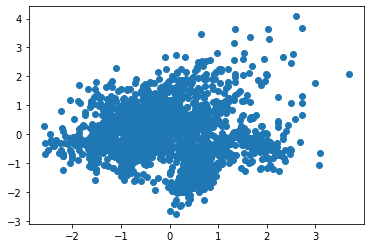

In [ ]:
# 주성분에 투영된 처음 두 개의 특성을 사용해 산점도 출력

plt.scatter(features_pca[:,0], features_pca[:, 1])
plt.show()

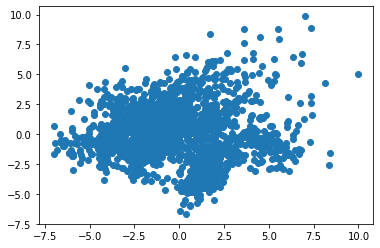

In [ ]:
# 화이트닝
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()

In [ ]:
# 특성 행렬을 주성분에 투영하려면 components_ 배열 전치하여 행렬곱을 수행합니다.
# 넘파이 allclose()를 사용하여 features_nowhiten 배열과 동일한지 확인
np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.
                                      T))

pca = PCA(whiten=True).fit(features)


# Numpy cumsum()을 사용하여 분산을 누적하여 그래프 출력
# 대략 30개의 주성분으로도 80이상의 분산을 유지
# 표준화하지 않은 원본 데이터 사용
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio))
plt.show()

AttributeError: ignored

In [ ]:
# 선형적으로 구분되지 않는 데이터차원 축소
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 만들기
features, _ = make_circles(n_samples = 1000, random_state=1, noise=0.1, factor=0.1)
print(features)

[[ 0.23058395 -0.10671314]
 [-0.0834218  -0.22647078]
 [ 0.9246533  -0.71492522]
 ...
 [ 0.02517206  0.00964548]
 [-0.92836187  0.06693357]
 [ 1.03502248  0.54878286]]


In [ ]:
# 방사 기저 함수 (radius basis function, RBF)를 사용하여 커널 PCA 적용
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수 : ", features.shape[1])
print("줄어든 특성 개수 : ", features_kpca.shape[1])

원본 특성 개수 :  2
줄어든 특성 개수 :  1
